## Backpropagation Exercise
In this exercise we will use backpropagation to train a multi-layer perceptron (with a single hidden layer).  We will experiment with different patterns and see how quickly or slowly the weights converge.  We will see the impact and interplay of different parameters such as learning rate, number of iterations, and number of data points.

In [16]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?
- If you have time, try varying the size of the hidden layer and experiment with different activation functions (e.g. ReLu)

In [17]:
num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size=(num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate((x_mat_1,x_mat_bias), axis=1)

In [18]:
# Diamond Pattern
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

In [19]:
x_mat_full

array([[ 0.99418856, -0.75357092,  1.        ],
       [-0.75832505, -0.47211473,  1.        ],
       [ 0.62879649, -0.08697439,  1.        ],
       ...,
       [-0.6942412 , -0.96299794,  1.        ],
       [-0.07216877, -0.74667002,  1.        ],
       [ 0.5686703 ,  0.08197889,  1.        ]])

In [20]:
x_mat_full[y==1,0]

array([ 6.28796487e-01, -1.92290347e-02,  8.35997775e-02, -6.46854715e-01,
       -5.02739989e-01, -1.39112471e-01, -1.89999331e-01,  5.93408294e-01,
       -2.81527665e-01,  5.63531755e-01,  5.21422838e-01,  2.97373526e-01,
        3.62694167e-01, -2.37022011e-01,  4.44098823e-01, -4.02177580e-01,
        6.48917212e-01, -2.26814546e-01, -6.61807897e-01, -4.33341175e-01,
        8.31353350e-02, -8.38858773e-01,  1.13892591e-01,  5.05042050e-01,
        8.20072597e-02, -1.08699559e-01,  5.65912010e-01, -6.34332930e-01,
       -6.41010149e-01,  1.56166782e-01,  4.50715382e-01, -4.83928195e-01,
       -2.88507263e-01, -8.11571964e-01, -2.88828133e-01, -6.38821604e-01,
        7.05909591e-01,  1.60087679e-01, -3.32228540e-01,  7.08415872e-01,
        1.60099624e-01,  2.67223919e-01,  7.49346214e-01,  1.74881816e-01,
       -4.78935679e-01,  2.07971040e-01, -5.84798161e-01, -6.92309582e-01,
       -5.64595153e-02, -6.06108354e-01,  1.97733616e-01, -6.22480808e-01,
        5.22883153e-01,  

In [21]:
x_mat_full

array([[ 0.99418856, -0.75357092,  1.        ],
       [-0.75832505, -0.47211473,  1.        ],
       [ 0.62879649, -0.08697439,  1.        ],
       ...,
       [-0.6942412 , -0.96299794,  1.        ],
       [-0.07216877, -0.74667002,  1.        ],
       [ 0.5686703 ,  0.08197889,  1.        ]])

shape of x_mat_full is (500, 3)
shape of y is (500,)


(-1.0953120469151658,
 1.0978161515865223,
 -1.0994679808444427,
 1.0956723066078156)

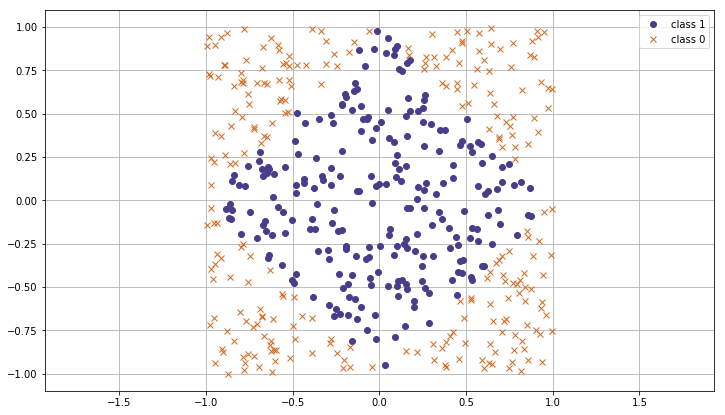

In [22]:
print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(12,7))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
ax.grid(True)
ax.legend(loc='best')
ax.axis('equal')

Here are some helper functions

In [23]:
# The sigmoid function
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def loss_fn(y_true, y_pred, eps=1e-16):
    y_pred = np.maximum(eps, np.minimum((1-eps),y_pred))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1 - y_true)*np.log(1 - y_pred)))/len(y_true)

def forward_pass(W1,W2):
    global x_mat
    global y
    global num_
    
    # The new predictions 'y_pred'
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    
    # Now the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1 - sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1),W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)
    
    return y_pred, gradient

def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16,8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1,2,1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations',title='Log loss')
    
    ax = fig.add_subplot(1,2,2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations',title='Accuracy')

In [24]:
# @tesT16%maK 
# (500*3) -> (3*4) -> (4*3)
row_col = x_mat_full.shape[1]+1

In [26]:
np.random.seed(1241)

W_1 = np.random.uniform(1,-1,size=(3, row_col))
W_2 = np.random.uniform(1,-1,size=(row_col, 3))
num_iter = 1000
learning_rate = 0.001 
x_mat = x_mat_full

Complete the pseudocode below

In [29]:
np.dot(x_mat_full, W_1)

array([[-0.59816793, -0.15310023,  0.10252296,  1.38424214],
       [ 0.9671824 , -1.44926405, -1.22103988,  0.43914186],
       [-0.65405287, -0.37047225, -0.161745  ,  0.93294601],
       ...,
       [ 1.21213661, -1.44366659, -1.18188271,  0.67469775],
       [ 0.45765308, -0.95607591, -0.70598982,  0.87791298],
       [-0.70051333, -0.40108699, -0.20409138,  0.83389861]])

In [31]:
forward_pass()

TypeError: forward_pass() missing 2 required positional arguments: 'W1' and 'W2'

In [ ]:
#### Initialize the network parameters

np.random.seed(1241)

W_1 = np.random(1,-1,size=(3, row_col))
W_2 = np.random(1,-1,size=(row_col, 3))
num_iter = 1000
learning_rate = 0.001 
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    
    
    ## Update the weight matrices
    
    ### Compute the loss and accuracy

    ## Print the loss and accuracy for every 200th iteration
    
plot_loss_accuracy(loss_vals, accuracies)

In [ ]:
#### Plot the predicted answers with mistakes in yellow